In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  6 22:35:27 2021

1-1a-trainnig :

此神經網路架構為input layer ==> hidden layer ==> output layer的幾單結構。三層的節點數量分別為1024, 100, 6。 訓練的batch size一開始設先為1000，最後匯出Loss及Accuracy, Loss曲線有明顯向下收斂，但Accuracy仍然不穩定，可能與網路結構較簡單及神經元數量較少有關。 Epoch=100。Lr=0.05


"""


import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt

train = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\train.npz')
test = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\test.npz')
#list(X_train.keys()) #image,label
#np.shape(X_test['image'])
X_train = np.array(train['image'])/255
Y_train = np.array(train['label'])

Y_train = Y_train.reshape(51000,1)
yy=Y_train.reshape(51000,)
Y_train_=pd.get_dummies(yy)

X_train = X_train.reshape(51000, 32*32).astype('float32')


x = X_train
y = Y_train_


# activation function
  
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# weight initializing => random
def initial_weight(a, b):   #layer input & output size
    l =[]
    for i in range(a * b):
        l.append(np.random.randn())
    return np.array(l).reshape(a, b)
  
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
      
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return a2
   


def softmax(x):
    exp_x = np.exp(x)
    
    for i in range(exp_x.shape[0]):
        sum_val = exp_x[i].sum()
        for j in range(exp_x.shape[1]):
            exp_x[i,j] = exp_x[i,j]/sum_val
        
    return exp_x


# cross entropy
def loss(y,t): #y is predicted result; t is target
    #x=np.log(softmax(x))
    y = softmax(y)
    
    Cross_en_loss = abs(np.sum(-t*np.log(y+1e-6)))/1000
    
    return Cross_en_loss/1000


    
# Back propagation  
def back_prop(x, y, w1, w2, alpha,batch_size):
     
    w1_adj = 0
    w2_adj = 0
    
    for i in range(batch_size):
        x_input = x[i]
        y_input = y[i]
        z1 = x_input.dot(w1) #(10,)
        a1 = sigmoid(z1)  #(10,)1
          
        # Output layer
        z2 = a1.dot(w2)#(6,)
        a2 = sigmoid(z2)# output of out layer (6,)
        
        d2 =(a2-y_input) #(6,)
        
        # Gradient for w1 and w2
        #w1_adj = x.reshape(len(x[1]),1).dot(d1.reshape(1,len(d1))) 
        w2_adj += np.reshape(d2*sigmoid(z2)*(1-sigmoid(z2)),(-1,1)).dot(a1.reshape(1,-1)).T  #(10,6)
        
        w1_adj += np.reshape((d2*sigmoid(z2)*(1-sigmoid(z2))).T.dot(w2.T)*sigmoid(z1)*(1-sigmoid(z1)),(-1,1)).dot(np.reshape(x_input,(1,-1))).T   #(1024,10)
        
        
    w1_adj = w1_adj/batch_size 
    w2_adj = w2_adj/batch_size 
    
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
      
    return w1, w2
  
def train(x, Y, y_true, w1, w2, alpha = 0.10, epoch = 10, batch_size=1000):
    acc =[]
    losss =[]
    
    for j in range(epoch):
        l =[]
        pred = []
        pred = np.array(pred)
        
        idx=np.arange(51000)
        np.random.shuffle(idx)
        x = x[idx,:]
        Y = Y[idx,:]
        yyy = y_true[idx]
        start = time.time()
        for i in range(0,51):
                       
            x_train= x[(i*batch_size):(i+1)*batch_size,:]
            target = Y[(i*batch_size):(i+1)*batch_size,:]
            Y_train = f_forward(x_train,w1,w2)
            yhat = predict(x_train,w1,w2)
            
            loss_value = loss(Y_train,target)
            
            pred = np.append(pred,yhat)
            l.append(loss_value)
            
            w1, w2 = back_prop(x_train, target, w1, w2, alpha, batch_size)
                
            if(i%10==0 and i!=0):
                print('Iteration at %d, loss: %.5f' %(i, l[i]))
                
        final = time.time()
        training_time = final-start
        print("epo", j + 1, ", acc:", sum(yyy==pred)/len(yyy)*100,"% training time:", training_time)   
        #acc.append((1-(sum(l)/len(x)))*100)
        acc.append(sum(yyy==pred)/len(yyy)*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2
   



def predict(x, w1, w2):
    y_pred = f_forward(x, w1, w2)
    
    maxm = 0
    array = []
    for i in range(0,y_pred.shape[0]):
        target = 0
        maxm=y_pred[i,0]
        for j in range(0,y_pred.shape[1]):
            
            if(j==0):
                next
            
            if(maxm<=y_pred[i,j]):
                maxm = y_pred[i,j]
                target = j
            elif(maxm>y_pred[i,j]):
                next
                
        array.append(target)
    
    return array

w1 = initial_weight(1024, 50)
w2 = initial_weight(50, 6)

y = np.array(y)

acc, losss, w1, w2 = train(x, y, yy, w1, w2, 0.05, 100, batch_size=1000)
y_pred= predict(X_train,w1,w2)
#y_pred = f_forward(X_test, w1, w2)
plt.plot(np.array(losss))
plt.ylabel('LOSS')
plt.show()
plt.plot(np.array(acc))
plt.ylabel('Accuracy')
plt.show()


eration at 40, loss: 0.44189
Iteration at 50, loss: 0.44065
epo 11 , acc: 16.680392156862744 % training time: 10.927873611450195
Iteration at 10, loss: 0.44268
Iteration at 20, loss: 0.44156
Iteration at 30, loss: 0.43710
Iteration at 40, loss: 0.44083
Iteration at 50, loss: 0.43721
epo 12 , acc: 16.515686274509804 % training time: 10.361630201339722
Iteration at 10, loss: 0.43717
Iteration at 20, loss: 0.43788
Iteration at 30, loss: 0.43620
Iteration at 40, loss: 0.43597
Iteration at 50, loss: 0.43607
epo 13 , acc: 16.590196078431372 % training time: 10.997636795043945
Iteration at 10, loss: 0.43362
Iteration at 20, loss: 0.43198
Iteration at 30, loss: 0.43334
Iteration at 40, loss: 0.43055
Iteration at 50, loss: 0.43458
epo 14 , acc: 16.856862745098038 % training time: 10.745713472366333
Iteration at 10, loss: 0.43860
Iteration at 20, loss: 0.43284
Iteration at 30, loss: 0.43455
Iteration at 40, loss: 0.43244
Iteration at 50, loss: 0.43383
epo 15 , acc: 16.70392156862745 % training t

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

0, loss: 0.02915
Iteration at 80, loss: 0.02971
Iteration at 90, loss: 0.02992
epo 14 , acc: 18.657279356298716 % training time: 2.0180752277374268
Iteration at 10, loss: 0.02893
Iteration at 20, loss: 0.02974
Iteration at 30, loss: 0.02898
Iteration at 40, loss: 0.02916
Iteration at 50, loss: 0.02930
Iteration at 60, loss: 0.02882
Iteration at 70, loss: 0.03005
Iteration at 80, loss: 0.02866
Iteration at 90, loss: 0.02947
epo 15 , acc: 17.60120693990445 % training time: 1.9331319332122803
Iteration at 10, loss: 0.02879
Iteration at 20, loss: 0.02931
Iteration at 30, loss: 0.02923
Iteration at 40, loss: 0.02964
Iteration at 50, loss: 0.02980
Iteration at 60, loss: 0.02950
Iteration at 70, loss: 0.02970
Iteration at 80, loss: 0.03124
Iteration at 90, loss: 0.03160
epo 16 , acc: 19.13502640181041 % training time: 1.9657719135284424
Iteration at 10, loss: 0.02921
Iteration at 20, loss: 0.03005
Iteration at 30, loss: 0.02915
Iteration at 40, loss: 0.02930
Iteration at 50, loss: 0.02868
Ite

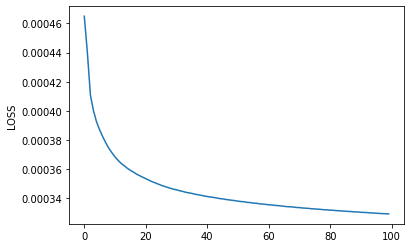

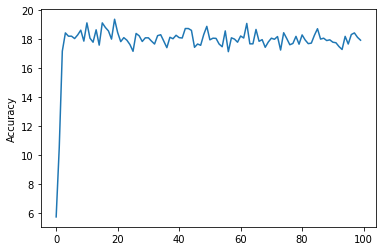

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  6 22:35:27 2021

1-1a: testing testing的狀況和training差不多，資料數量比較小訓練上稍稍有快一點。

"""

import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt

train = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\train.npz')
test = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\test.npz')
#list(X_train.keys()) #image,label
#np.shape(X_test['image'])
X_train = np.array(train['image'])/255
Y_train = np.array(train['label'])
Y_train = Y_train.reshape(51000,1)
yy=Y_train.reshape(51000,)
Y_train_=pd.get_dummies(yy)
X_train = X_train.reshape(51000, 32*32).astype('float32')



X_test = np.array(test['image'])/255
Y_test = np.array(test['label'])
Y_test = Y_test.reshape(7954,1)
yy=Y_test.reshape(7954,)
Y_test_=pd.get_dummies(yy)
X_test = X_test.reshape(7954, 32*32).astype('float32')
x = X_test
y = Y_test_

# activation function
  
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# weight initializing => random
def initial_weight(a, b):   #layer input & output size
    l =[]
    for i in range(a * b):
        l.append(np.random.randn())
    return np.array(l).reshape(a, b)
  
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
      
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return a2
   


def softmax(x):
    exp_x = np.exp(x)
    
    for i in range(exp_x.shape[0]):
        sum_val = exp_x[i].sum()
        for j in range(exp_x.shape[1]):
            exp_x[i,j] = exp_x[i,j]/sum_val
        
    return exp_x



# cross entropy
def loss(y,t): #y is predicted result; t is target
    #x=np.log(softmax(x))
    y = softmax(y)
    
    Cross_en_loss = abs(np.sum(-t*np.log(y+1e-6)))/1000
    
    return Cross_en_loss/1000


# Back propagation  
def back_prop(x, y, w1, w2, alpha,batch_size):
     
    w1_adj = 0
    w2_adj = 0
    
    for i in range(batch_size):
        x_input = x[i]
        y_input = y[i]
        z1 = x_input.dot(w1) #(10,)
        a1 = sigmoid(z1)  #(10,)1
          
        # Output layer
        z2 = a1.dot(w2)#(6,)
        a2 = sigmoid(z2)# output of out layer (6,)
        
        d2 =(a2-y_input) #(6,)
        
        # Gradient for w1 and w2
        #w1_adj = x.reshape(len(x[1]),1).dot(d1.reshape(1,len(d1))) 
        w2_adj += np.reshape(d2*sigmoid(z2)*(1-sigmoid(z2)),(-1,1)).dot(a1.reshape(1,-1)).T  #(10,6)
        
        w1_adj += np.reshape((d2*sigmoid(z2)*(1-sigmoid(z2))).T.dot(w2.T)*sigmoid(z1)*(1-sigmoid(z1)),(-1,1)).dot(np.reshape(x_input,(1,-1))).T   #(1024,10)
        
        
    w1_adj = w1_adj/batch_size 
    w2_adj = w2_adj/batch_size 
    
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
      
    return w1, w2
  
def train(x, Y, y_true, w1, w2, alpha = 0.10, epoch = 10, batch_size=82):
    acc =[]
    losss =[]
    
    for j in range(epoch):
        l =[]
        pred = []
        pred = np.array(pred)
        
        idx=np.arange(7954)
        np.random.shuffle(idx)
        x = x[idx,:]
        Y = Y[idx,:]
        yyy = y_true[idx]
        start = time.time()
        for i in range(0,97):
                       
            x_train= x[(i*batch_size):(i+1)*batch_size,:]
            target = Y[(i*batch_size):(i+1)*batch_size,:]
            Y_train = f_forward(x_train,w1,w2)
            yhat = predict(x_train,w1,w2)
            
            loss_value = loss(Y_train,target)
            
            pred = np.append(pred,yhat)
            l.append(loss_value)
            
            w1, w2 = back_prop(x_train, target, w1, w2, alpha, batch_size)
                
            if(i%10==0 and i!=0):
                print('Iteration at %d, loss: %.5f' %(i, l[i]))
                
        final = time.time()
        training_time = final-start
        print("epo", j + 1, ", acc:", sum(yyy==pred)/len(yyy)*100,"% training time:", training_time)   
        #acc.append((1-(sum(l)/len(x)))*100)
        acc.append(sum(yyy==pred)/len(yyy)*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2
   
    



def predict(x, w1, w2):
    y_pred = f_forward(x, w1, w2)
    
    maxm = 0
    array = []
    for i in range(0,y_pred.shape[0]):
        target = 0
        maxm=y_pred[i,0]
        for j in range(0,y_pred.shape[1]):
            
            if(j==0):
                next
            
            if(maxm<=y_pred[i,j]):
                maxm = y_pred[i,j]
                target = j
            elif(maxm>y_pred[i,j]):
                next
                
        array.append(target)
    
    return array

w1 = initial_weight(1024, 40)
w2 = initial_weight(40, 6)

y = np.array(y)

acc, losss, w1, w2 = train(x, y, yy, w1, w2, 0.05, 100, batch_size=82)
y_pred= predict(X_train,w1,w2)
#y_pred = f_forward(X_test, w1, w2)
plt.plot(np.array(losss))
plt.ylabel('LOSS')
plt.show()
plt.plot(np.array(acc))
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  6 22:35:27 2021

1-1c : zero-initialization

原本期待W不會被更新，但是看到W有在更新。因為dL/dw都有微幅在增加和訓練，以致W本身開始變動。

"""


import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt

train = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\train.npz')
test = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\test.npz')

X_train = np.array(train['image'])/255
Y_train = np.array(train['label'])

Y_train = Y_train.reshape(51000,1)

yy=Y_train.reshape(51000,)
Y_train_=pd.get_dummies(yy)



X_train = X_train.reshape(51000, 32*32).astype('float32')


x = X_train
y = Y_train_


# activation function
  
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# weight 0  initializing => random
def initial_weight(a, b):  
    l =[]
 
    for i in range(a * b):
        l.append(0)
    return np.array(l).reshape(a, b)


def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
      
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return a2
   


def softmax(x):
    exp_x = np.exp(x)
    
    for i in range(exp_x.shape[0]):
        sum_val = exp_x[i].sum()
        for j in range(exp_x.shape[1]):
            exp_x[i,j] = exp_x[i,j]/sum_val
        
    return exp_x


# cross entropy
def loss(y,t): #y is predicted result; t is target
    #x=np.log(softmax(x))
    y = softmax(y)
    
    Cross_en_loss = abs(np.sum(-t*np.log(y+1e-6)))/1000
    
    return Cross_en_loss/1000




    
# Back propagation  
def back_prop(x, y, w1, w2, alpha,batch_size):
     
    w1_adj = 0
    w2_adj = 0
    
    for i in range(batch_size):
        x_input = x[i]
        y_input = y[i]
        z1 = x_input.dot(w1) #(10,)
        a1 = sigmoid(z1)  #(10,)1
          
        # Output layer
        z2 = a1.dot(w2)#(6,)
        a2 = sigmoid(z2)# output of out layer (6,)
        
        d2 =(a2-y_input) #(6,)
        
        # Gradient for w1 and w2
        #w1_adj = x.reshape(len(x[1]),1).dot(d1.reshape(1,len(d1))) 
        w2_adj += np.reshape(d2*sigmoid(z2)*(1-sigmoid(z2)),(-1,1)).dot(a1.reshape(1,-1)).T  #(10,6)
        
        w1_adj += np.reshape((d2*sigmoid(z2)*(1-sigmoid(z2))).T.dot(w2.T)*sigmoid(z1)*(1-sigmoid(z1)),(-1,1)).dot(np.reshape(x_input,(1,-1))).T   #(1024,10)
        
        
    w1_adj = w1_adj/batch_size 
    w2_adj = w2_adj/batch_size 
    
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
      
    return w1, w2
  
def train(x, Y, y_true, w1, w2, alpha = 0.10, epoch = 10, batch_size=1000):
    acc =[]
    losss =[]
    
    for j in range(epoch):
        l =[]
        pred = []
        pred = np.array(pred)
        
        idx=np.arange(51000)
        np.random.shuffle(idx)
        x = x[idx,:]
        Y = Y[idx,:]
        yyy = y_true[idx]
        start = time.time()
        for i in range(0,51):
                       
            x_train= x[(i*batch_size):(i+1)*batch_size,:]
            target = Y[(i*batch_size):(i+1)*batch_size,:]
            Y_train = f_forward(x_train,w1,w2)
            yhat = predict(x_train,w1,w2)
            
            loss_value = loss(Y_train,target)
            
            pred = np.append(pred,yhat)
            l.append(loss_value)
            
            w1, w2 = back_prop(x_train, target, w1, w2, alpha, batch_size)
                
            if(i%10==0 and i!=0):
                print('Iteration at %d, loss: %.5f' %(i, l[i]))
                
        final = time.time()
        training_time = final-start
        print("epo", j + 1, ", acc:", sum(yyy==pred)/len(yyy)*100,"% training time:", training_time)   
        #acc.append((1-(sum(l)/len(x)))*100)
        acc.append(sum(yyy==pred)/len(yyy)*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2
   
    



def predict(x, w1, w2):
    y_pred = f_forward(x, w1, w2)
    
    maxm = 0
    array = []
    for i in range(0,y_pred.shape[0]):
        target = 0
        maxm=y_pred[i,0]
        for j in range(0,y_pred.shape[1]):
            
            if(j==0):
                next
            
            if(maxm<=y_pred[i,j]):
                maxm = y_pred[i,j]
                target = j
            elif(maxm>y_pred[i,j]):
                next
                
        array.append(target)
    
    return array

w1 = initial_weight(1024, 40)
w2 = initial_weight(40, 6)

y = np.array(y)

acc, losss, w1, w2 = train(x, y, yy, w1, w2, 0.05, 100, batch_size=1000)
y_pred= predict(X_train,w1,w2)
#y_pred = f_forward(X_test, w1, w2)
plt.plot(np.array(losss))
plt.ylabel('LOSS')
plt.show()
plt.plot(np.array(acc))
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  6 22:35:27 2021

1-1b :

batch size : 1000===>,100,3000,5100
batch size = 5100 時觀察到訓練時間增加。
             3000 時觀察到訓練時間增加
             100  時   
"""


import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt

train = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\train.npz')
test = np.load(r'C:\Users\Jimmy\Desktop\suzy\DL homework\DL_HW1\Problem1\MedMNIST\test.npz')
#list(X_train.keys()) #image,label
#np.shape(X_test['image'])
X_train = np.array(train['image'])/255
Y_train = np.array(train['label'])

Y_train = Y_train.reshape(51000,1)
#Y_train = repr(Y_train) #camma
yy=Y_train.reshape(51000,)
Y_train_=pd.get_dummies(yy)

batch_size = 100

X_train = X_train.reshape(51000, 32*32).astype('float32')


x = X_train
y = Y_train_


# activation function
  
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# weight initializing => random
def initial_weight(a, b):   #layer input & output size
    l =[]
    for i in range(a * b):
        l.append(np.random.randn())
    return np.array(l).reshape(a, b)
  
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
      
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return a2
   


def softmax(x):
    exp_x = np.exp(x)
    
    for i in range(exp_x.shape[0]):
        sum_val = exp_x[i].sum()
        for j in range(exp_x.shape[1]):
            exp_x[i,j] = exp_x[i,j]/sum_val
        
    return exp_x


# cross entropy
def loss(y,t): #y is predicted result; t is target
    #x=np.log(softmax(x))
    y = softmax(y)
    
    Cross_en_loss = abs(np.sum(-t*np.log(y+1e-6)))/1000
    
    return Cross_en_loss/1000


    
# Back propagation  
def back_prop(x, y, w1, w2, alpha,batch_size):
     
    w1_adj = 0
    w2_adj = 0
    
    for i in range(batch_size):
        x_input = x[i]
        y_input = y[i]
        z1 = x_input.dot(w1) #(10,)
        a1 = sigmoid(z1)  #(10,)1
          
        # Output layer
        z2 = a1.dot(w2)#(6,)
        a2 = sigmoid(z2)# output of out layer (6,)
        
        d2 =(a2-y_input) #(6,)
        
        # Gradient for w1 and w2
        #w1_adj = x.reshape(len(x[1]),1).dot(d1.reshape(1,len(d1))) 
        w2_adj += np.reshape(d2*sigmoid(z2)*(1-sigmoid(z2)),(-1,1)).dot(a1.reshape(1,-1)).T  #(10,6)
        
        w1_adj += np.reshape((d2*sigmoid(z2)*(1-sigmoid(z2))).T.dot(w2.T)*sigmoid(z1)*(1-sigmoid(z1)),(-1,1)).dot(np.reshape(x_input,(1,-1))).T   #(1024,10)
        
        
    w1_adj = w1_adj/batch_size 
    w2_adj = w2_adj/batch_size 
    
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
      
    return w1, w2
  
def train(x, Y, y_true, w1, w2, alpha = 0.10, epoch = 10, batch_size = 3000 ):
    acc =[]
    losss =[]
    
    for j in range(epoch):
        l =[]
        pred = []
        pred = np.array(pred)
        
        idx=np.arange(51000)
        np.random.shuffle(idx)
        x = x[idx,:]
        Y = Y[idx,:]
        yyy = y_true[idx]
        start = time.time()
        for i in range(0,510):
                       
            x_train= x[(i*batch_size):(i+1)*batch_size,:]
            target = Y[(i*batch_size):(i+1)*batch_size,:]
            Y_train = f_forward(x_train,w1,w2)
            yhat = predict(x_train,w1,w2)
            
            loss_value = loss(Y_train,target)
            
            pred = np.append(pred,yhat)
            l.append(loss_value)
            
            w1, w2 = back_prop(x_train, target, w1, w2, alpha, batch_size)
                
            if(i%100==0 and i!=0):
                print('Iteration at %d, loss: %.5f' %(i, l[i]))
                
        final = time.time()
        training_time = final-start
        print("epo", j + 1, ", acc:", sum(yyy==pred)/len(yyy)*100,"% training time:", training_time)   
        
        acc.append(sum(yyy==pred)/len(yyy)*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2
   



def predict(x, w1, w2):
    y_pred = f_forward(x, w1, w2)
    
    maxm = 0
    array = []
    for i in range(0,y_pred.shape[0]):
        target = 0
        maxm=y_pred[i,0]
        for j in range(0,y_pred.shape[1]):
            
            if(j==0):
                next
            
            if(maxm<=y_pred[i,j]):
                maxm = y_pred[i,j]
                target = j
            elif(maxm>y_pred[i,j]):
                next
                
        array.append(target)
    
    return array

w1 = initial_weight(1024, 40)
w2 = initial_weight(40, 6)

y = np.array(y)

acc, losss, w1, w2 = train(x, y, yy, w1, w2, 0.05, 100, batch_size)
y_pred= predict(X_train,w1,w2)
#y_pred = f_forward(X_test, w1, w2)
plt.plot(np.array(losss))
plt.ylabel('LOSS')
plt.show()
plt.plot(np.array(acc))
plt.ylabel('Accuracy')
plt.show()
